<a href="https://colab.research.google.com/github/1X-HE/OKOKqm2/blob/main/Seasonal_fluctuation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data loaded successfully: 1056 rows, 27 columns
Found 24 months of data

=== Monthly Average Analysis by Crime Type ===
Crime Type Monthly Average Ranking:
                               CrimeType  MonthlyAverage
0                                  THEFT    25355.833333
1            VIOLENCE AGAINST THE PERSON    19982.583333
2                       VEHICLE OFFENCES     7908.958333
3                  PUBLIC ORDER OFFENCES     4713.166667
4              ARSON AND CRIMINAL DAMAGE     4702.833333
5                               BURGLARY     4286.750000
6                          DRUG OFFENCES     3873.041667
7                                ROBBERY     2816.458333
8                        SEXUAL OFFENCES     2175.333333
9   MISCELLANEOUS CRIMES AGAINST SOCIETY      961.083333
10                 POSSESSION OF WEAPONS      481.666667
11                     FRAUD AND FORGERY        6.958333
12                            NFIB FRAUD        0.750000

=== Analyzing Crime Hotspot Boroughs ===

Cri

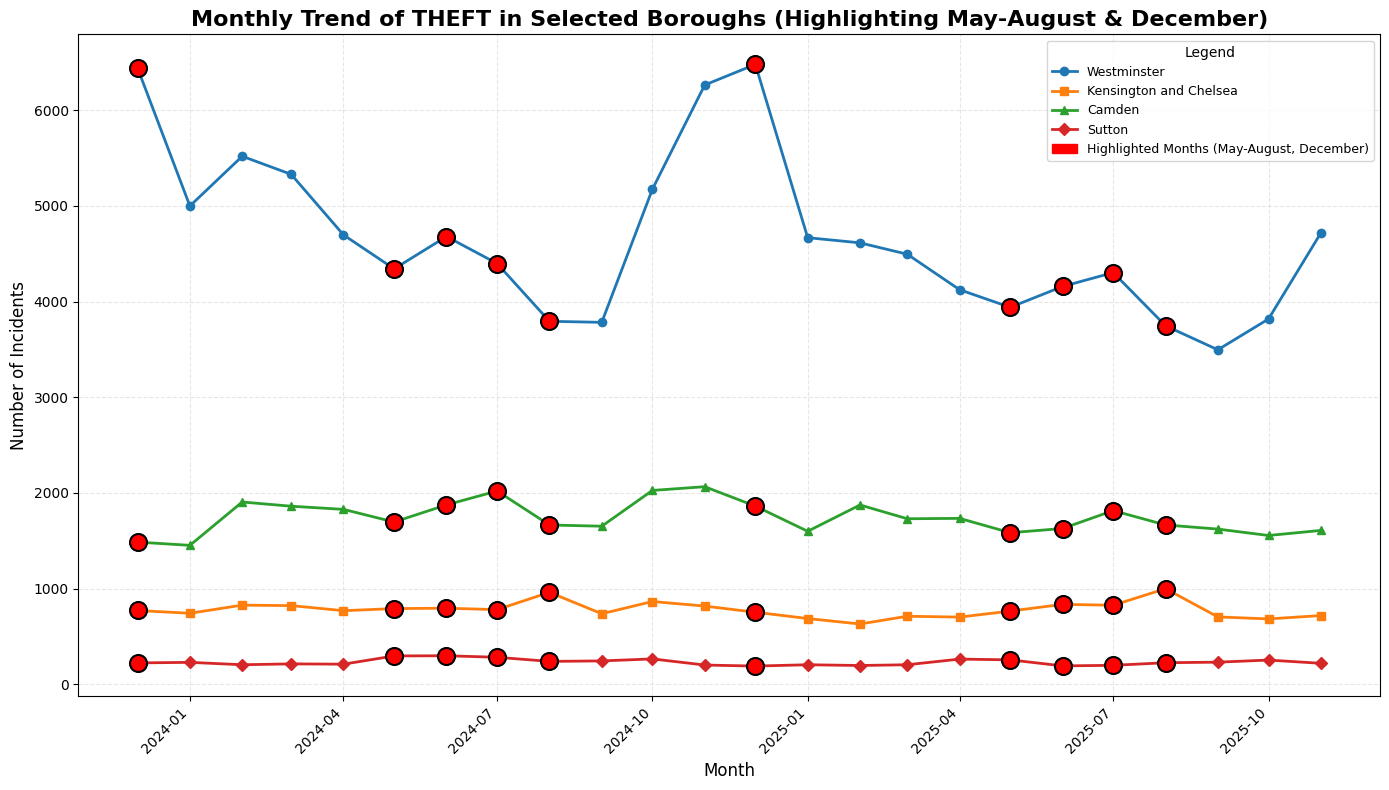


THEFT Statistics in Selected Boroughs:
  Westminster: Total 111980 incidents, Monthly Avg 4665.8
  Kensington and Chelsea: Total 18690 incidents, Monthly Avg 778.8
  Camden: Total 41807 incidents, Monthly Avg 1742.0
  Sutton: Total 5534 incidents, Monthly Avg 230.6
Chart saved: burglary_trend_analysis.png


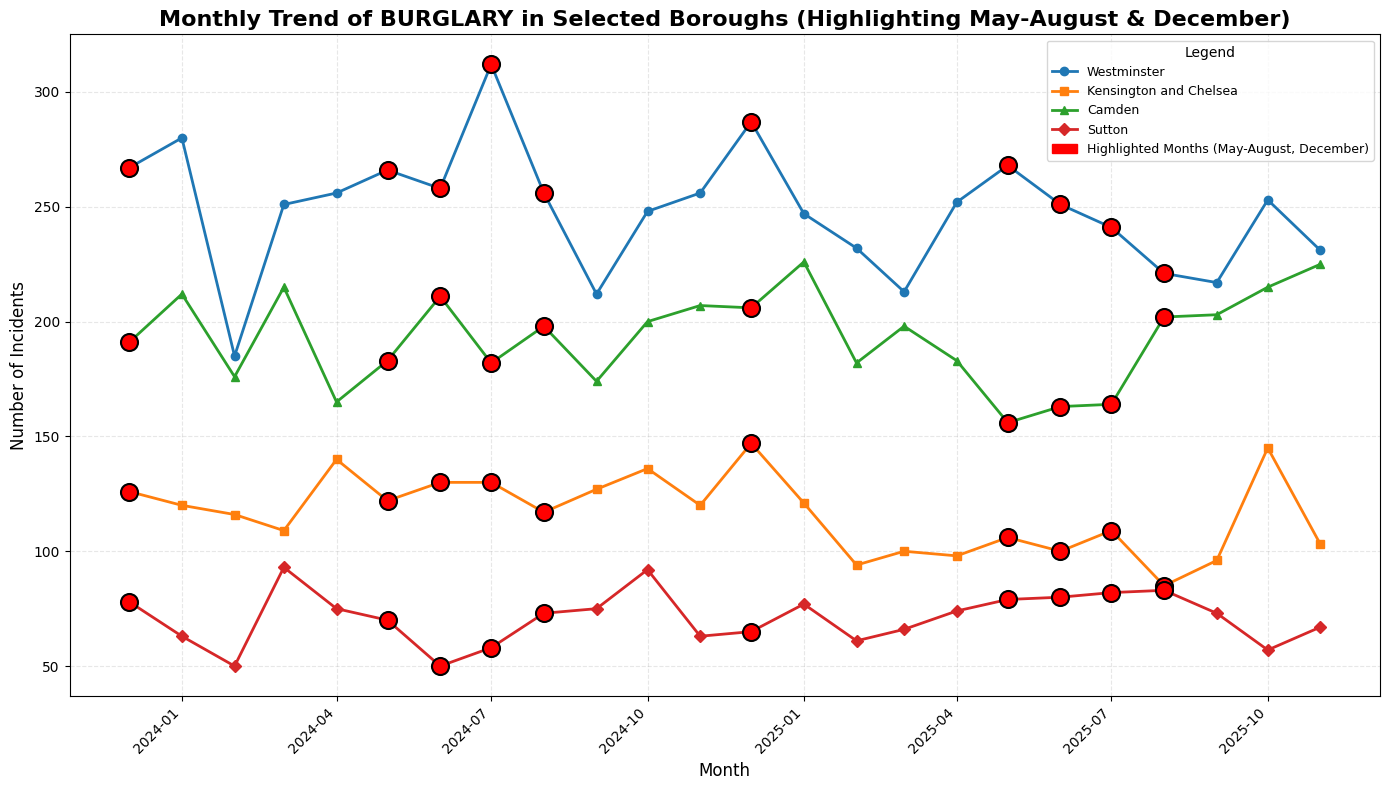


BURGLARY Statistics in Selected Boroughs:
  Westminster: Total 5960 incidents, Monthly Avg 248.3
  Kensington and Chelsea: Total 2797 incidents, Monthly Avg 116.5
  Camden: Total 4637 incidents, Monthly Avg 193.2
  Sutton: Total 1704 incidents, Monthly Avg 71.0
Error during analysis: name 'save_results' is not defined


Traceback (most recent call last):
  File "/tmp/ipython-input-1708236954.py", line 166, in main
    save_results(result_df, enhanced_result_df, aggregated_data)
    ^^^^^^^^^^^^
NameError: name 'save_results' is not defined


In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
from datetime import datetime
import warnings

warnings.filterwarnings('ignore')


def load_and_prepare_data(file_path):
    df = pd.read_csv(file_path)
    print(f"Data loaded successfully: {len(df)} rows, {len(df.columns)} columns")

    # Extract month columns
    month_columns = [str(col) for col in df.columns if col not in ['MajorText', 'MinorText', 'BoroughName']]
    print(f"Found {len(month_columns)} months of data")

    return df, month_columns



def analyze_specific_crimes(df, month_columns, target_crimes, target_boroughs):
    """Analyze trends for specific crime types in specific boroughs"""
    print(f"\n=== Analyzing Trends for {', '.join(target_crimes)} in Selected Boroughs ===")

    # Filter for target crime types and boroughs
    filtered_df = df[(df['MajorText'].isin(target_crimes)) &
                     (df['BoroughName'].isin(target_boroughs))]

    if filtered_df.empty:
        print(f"Warning: No data found for {target_crimes} in {target_boroughs}")
        return None
    # Transform data for analysis
    pivot_data = filtered_df.melt(
        id_vars=['MajorText', 'BoroughName'],
        value_vars=month_columns,
        var_name='Month',
        value_name='Incidents'
    )

    # Convert month to datetime format
    pivot_data['Month'] = pd.to_datetime(pivot_data['Month'], format='%Y%m')

    # Aggregate data
    aggregated_data = pivot_data.groupby(['MajorText', 'BoroughName', 'Month'])['Incidents'].sum().reset_index()

    return aggregated_data


def plot_crime_trends(aggregated_data, target_crimes, target_boroughs):
    """Plot crime trends and highlight specific months"""

    try:
        plt.rcParams['font.sans-serif'] = ['Arial', 'DejaVu Sans', 'Helvetica']
        plt.rcParams['axes.unicode_minus'] = False
    except:
        print("Note: Font settings may not take effect, chart labels may display abnormally")

    # Create charts for each crime type
    for crime in target_crimes:
        # Filter data for current crime type
        crime_data = aggregated_data[aggregated_data['MajorText'] == crime]

        if crime_data.empty:
            print(f"Warning: No data found for {crime}")
            continue

        # Create chart
        plt.figure(figsize=(14, 8))

        # Define colors and markers
        colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
        markers = ['o', 's', '^', 'D']

        # Plot trend lines for each borough
        for idx, borough in enumerate(target_boroughs):
            borough_data = crime_data[crime_data['BoroughName'] == borough]

            if not borough_data.empty:
                # Sort by month
                borough_data = borough_data.sort_values('Month')

                # Plot main trend line
                plt.plot(borough_data['Month'], borough_data['Incidents'],
                          marker=markers[idx],
                         color=colors[idx],
                         label=borough,
                         linewidth=2,
                         markersize=6)

                # Highlight May-August and December data points
                highlight_data = borough_data[
                    (borough_data['Month'].dt.month >= 5) &
                    (borough_data['Month'].dt.month <= 8) |
                    (borough_data['Month'].dt.month == 12)
                ]

                if not highlight_data.empty:
                    # Highlight points with larger red markers
                    plt.scatter(highlight_data['Month'], highlight_data['Incidents'],
                                color='red', s=150, zorder=5,
                                edgecolors='black', linewidths=1.5)

        # Chart formatting
        plt.title(f'Monthly Trend of {crime} in Selected Boroughs (Highlighting May-August & December)',
                  fontsize=16, fontweight='bold')
        plt.xlabel('Month', fontsize=12)
        plt.ylabel('Number of Incidents', fontsize=12)
        plt.legend(title='Borough', fontsize=10, title_fontsize=11)
        plt.grid(True, alpha=0.3, linestyle='--')

        # Set x-axis format
        plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m'))
        plt.xticks(rotation=45, ha='right')

        # Add highlight explanation
        highlight_patch = mpatches.Patch(color='red', label='Highlighted Months (May-August, December)')
        plt.legend(handles=[*plt.gca().get_legend_handles_labels()[0], highlight_patch],
                   title='Legend', fontsize=9, title_fontsize=10)

        # Adjust layout
        plt.tight_layout()

        # Save chart
        filename = f'{crime.lower()}_trend_analysis.png'
        plt.savefig(filename, dpi=300, bbox_inches='tight')
        print(f"Chart saved: {filename}")

        # Display chart
        plt.show()

        # Print statistical summary
        print(f"\n{crime} Statistics in Selected Boroughs:")
        for borough in target_boroughs:
            borough_stats = crime_data[crime_data['BoroughName'] == borough]
            if not borough_stats.empty:
                total = borough_stats['Incidents'].sum()
                avg = borough_stats['Incidents'].mean()
                print(f"  {borough}: Total {int(total)} incidents, Monthly Avg {avg:.1f}")
def main():
    """Main function: Execute complete crime data analysis workflow"""
    # Configure file path
    file_path = 'MPS Borough Level Crime (most recent 24 months).csv'

    try:
        # 1. Load data
        df, month_columns = load_and_prepare_data(file_path)
        # 2. Analyze crime trends
        result_df, monthly_totals = analyze_crime_trends(df, month_columns)

        # 3. Add hotspot borough information
        enhanced_result_df, borough_data = add_hotspot_boroughs(df, month_columns, result_df)

        # 4. Analyze trends for specific crime types in specific boroughs
        target_crimes = ['THEFT', 'BURGLARY']
        target_boroughs = ['Westminster', 'Kensington and Chelsea', 'Camden', 'Sutton']

        aggregated_data = analyze_specific_crimes(df, month_columns, target_crimes, target_boroughs)

        if aggregated_data is not None:
            # 5. Plot trends
            plot_crime_trends(aggregated_data, target_crimes, target_boroughs)

            # 6. Save all results
            save_results(result_df, enhanced_result_df, aggregated_data)

        print("\n=== Analysis Complete ===")
        print("Generated files:")
        print("1. crime_monthly_averages.csv - Monthly average data by crime type")
        print("2. crime_monthly_averages_with_hotspot_boroughs.csv - Enhanced data with hotspot boroughs")
        print("3. specific_crime_trends.csv - Specific crime type trend data")
        print("4. theft_trend_analysis.png - THEFT crime trend chart")
        print("5. burglary_trend_analysis.png - BURGLARY crime trend chart")

    except FileNotFoundError:
        print(f"Error: File not found: {file_path}")
        print("Please ensure CSV file is in the current directory, or modify the file path")
    except Exception as e:
        print(f"Error during analysis: {str(e)}")
        import traceback
        traceback.print_exc()


if __name__ == "__main__":
    main()



